### Load Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [2]:
import os

path = os.listdir('Project_Training/')
classes = {'Cats':0, 'Lions':1}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'Project_Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (400,400))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

0    110
1    110
dtype: int64

### Visualize data

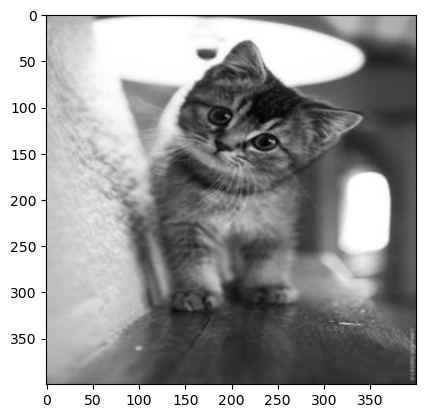

In [7]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [8]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(220, 160000)

In [9]:
X.shape, X_updated.shape

((220, 400, 400), (220, 160000))

### Split Data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=0.3)

In [11]:
xtrain.shape, xtest.shape

((154, 160000), (66, 160000))

### Feature Scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Train Model

In [13]:
from sklearn.svm import SVC

In [14]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Prediction

In [15]:
pred = sv.predict(xtest)


In [16]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 8, 13, 21, 24, 30, 31, 32, 33, 36, 39, 53, 55, 56, 63],
       dtype=int64),)

In [17]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  14
0 1


### Evaluation

In [18]:
from sklearn.metrics import r2_score,mean_squared_error
mean_squared_error(ytest, pred)
r2_score(ytest,pred)

0.893126381156381
